### Problem Statement

BoomBikes, a US bike-sharing provider, has experienced significant revenue dips due to the ongoing Corona pandemic. To accelerate its revenue, the company has partnered with a consulting company to understand the demand for shared bikes in the American market. The company aims to understand the factors affecting demand and how well those variables describe bike demands. They have gathered a large dataset on daily bike demands across the American market based on meteorological surveys and people's styles.


### Business Goal:

The business goal is to model the demand for shared bikes with available independent variables, allowing management to understand how demand varies with different features. This will enable them to manipulate their business strategy to meet demand levels and customer expectations, while also providing insight into the demand dynamics of a new market. The goal is to stand out from other service providers and make significant profits once the situation improves.



### Importing Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
# read the data set
bikes=pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [65]:
# checking the shape
bikes.shape

(730, 30)

In [4]:
# checkind columns data type and non values
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking the missing values
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing values, so good to continue

In [6]:

# Define the mapping dictionary
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

yr_map={0:'2018', 1:2019}

mnth_map={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

weekday_map={0:'Mon', 1: 'Tues',2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# I will map weathersi to below value for better reading
# 1: "Clear, Few clouds, Partly cloudy, Partly cloudy",    -->> Clear
# 2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",   -->> Mist+Cloudy
# 3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",  -->> Light Snow
# 4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"  -->> Heavy Rain
weathersit_map = {
    1: "Clear",
    2: "Mist + Cloudy",
    3: "Light Snow",
    4: "Heavy Rain"
}

In [7]:
# Map the coded columns using the mapping dictionary

bikes['season'] = bikes['season'].map(season_map)
bikes['yr'] = bikes['yr'].map(yr_map)
bikes['mnth'] = bikes['mnth'].map(mnth_map)
bikes['weekday'] = bikes['weekday'].map(weekday_map)
bikes['weathersit'] = bikes['weathersit'].map(weathersit_map)
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,Jan,0,Mon,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,Jan,0,Tues,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,Jan,0,Thurs,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bikes.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,Jan,0,Mon,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,Jan,0,Tues,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,Jan,0,Thurs,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bikes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [10]:
#categorize the columns to categorical and numerical
num_cols=['temp','atemp','hum','windspeed']
cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [11]:
# Dropping the redundant and unnecessary columns
bikes = bikes.drop(['dteday','instant','casual', 'registered'], axis=1)
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## EDA
### Visualising the Data

### Univariate Analysis

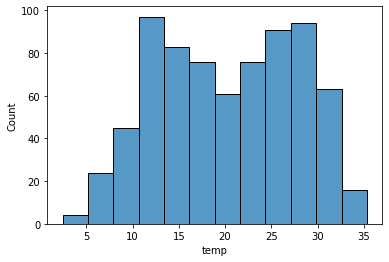

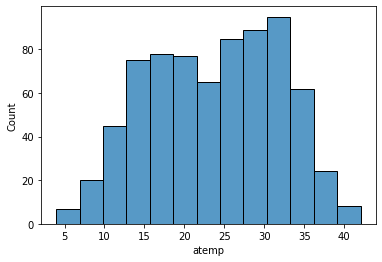

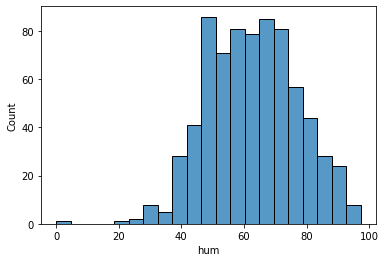

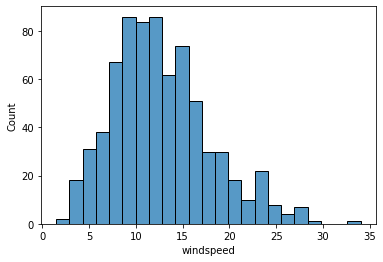

In [12]:
for i in num_cols:
    sns.histplot(x=bikes[i])
    plt.show()

### Finding and Observition:
1. Count of CNT increases between 45 and 75 of hum 
2. Count of CNT increases between 7 and 17 of windspeed
----------------------

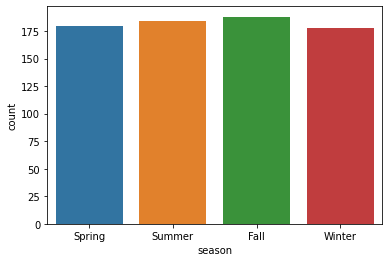

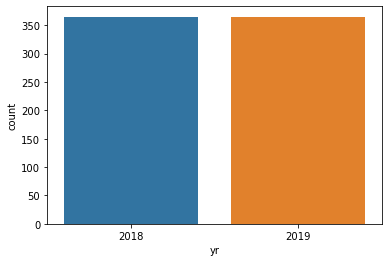

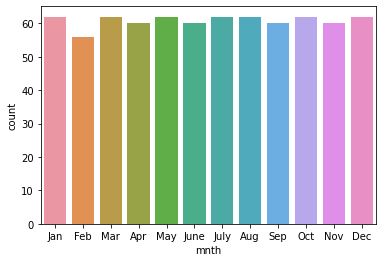

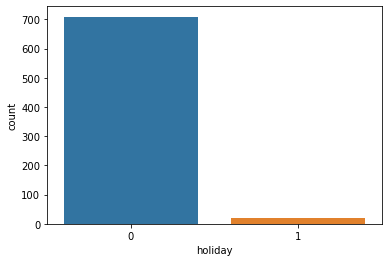

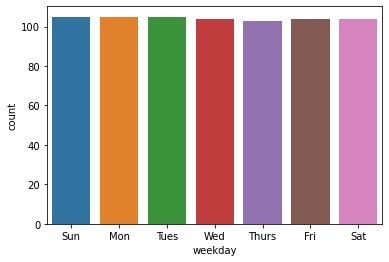

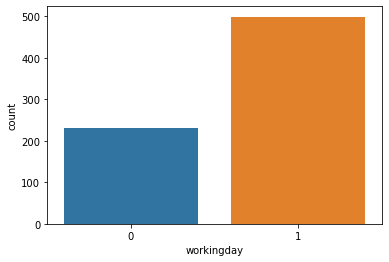

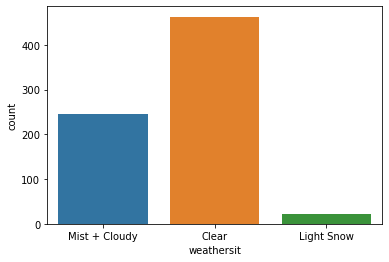

In [13]:
for i in cat_cols:
    sns.countplot(x=bikes[i])
    plt.show()

### Finding and Observition:
1. The majority of CNT in holiday=0
2. The majority of CNT in workingday=1
3. The majority of CNT in clear weathersit
-------------------------------------------------------------

## Bivariate Analysis

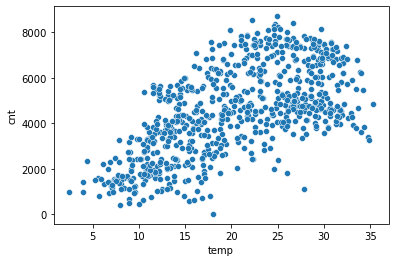

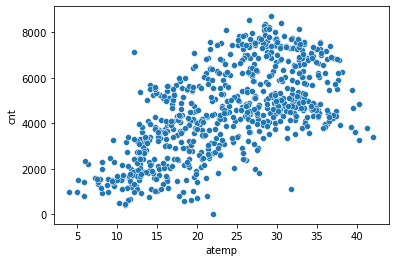

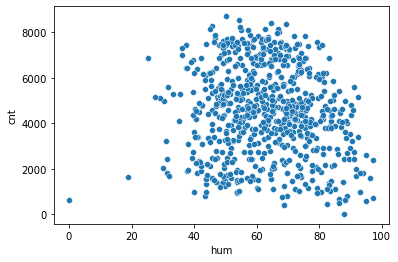

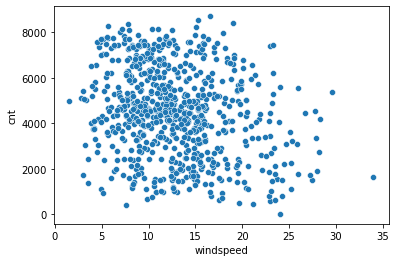

In [14]:
for i in num_cols:
    sns.scatterplot(x=bikes[i],y=bikes["cnt"])
    plt.show()

### Finding and Observition:
1. There is a positive relationship between temp and CNT
2. There is a positive relationship between atemp and CNT
3. The majority of cnt between 40 to 100 of hum
4. The majority of cnt between 5 to 30 of windspeed
----------------

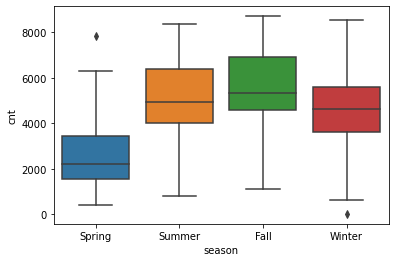

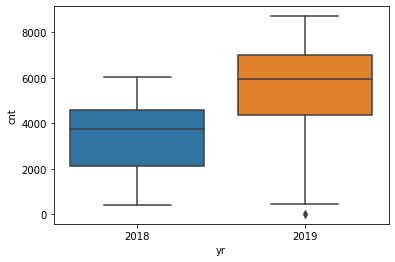

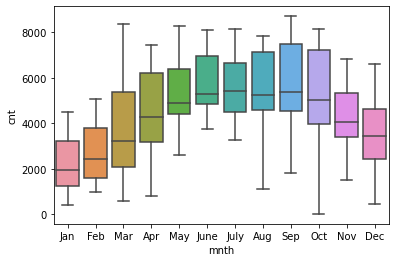

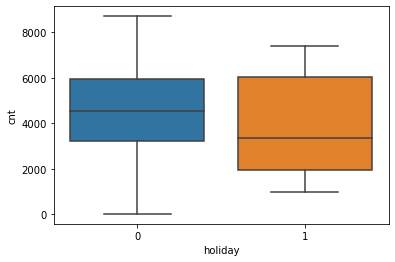

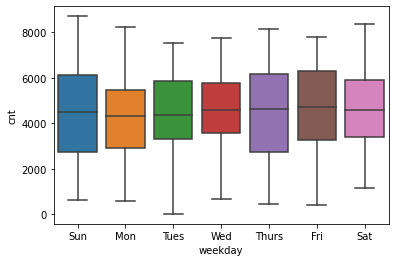

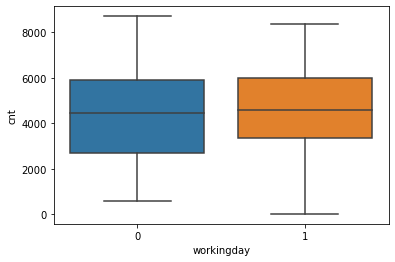

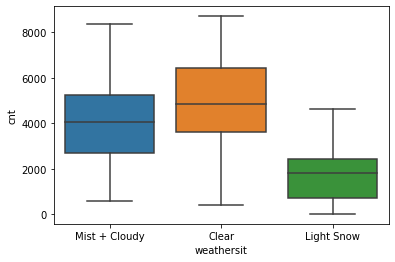

In [15]:
for i in cat_cols:
    sns.boxplot(x=bikes[i],y=bikes["cnt"])
    plt.show()

### Finding and Observition:
1. The CNT increases in the summer and fall.
2. The CNT increases around 50% in 2019
3. The CNT increases from May to Oct
4. The CNT increases in holiday=0
5. The CNT increases in clear weathersit then Mist+ Cloudy and decreases in Light Snow
-------------------------------------

### Multivariate Analysis

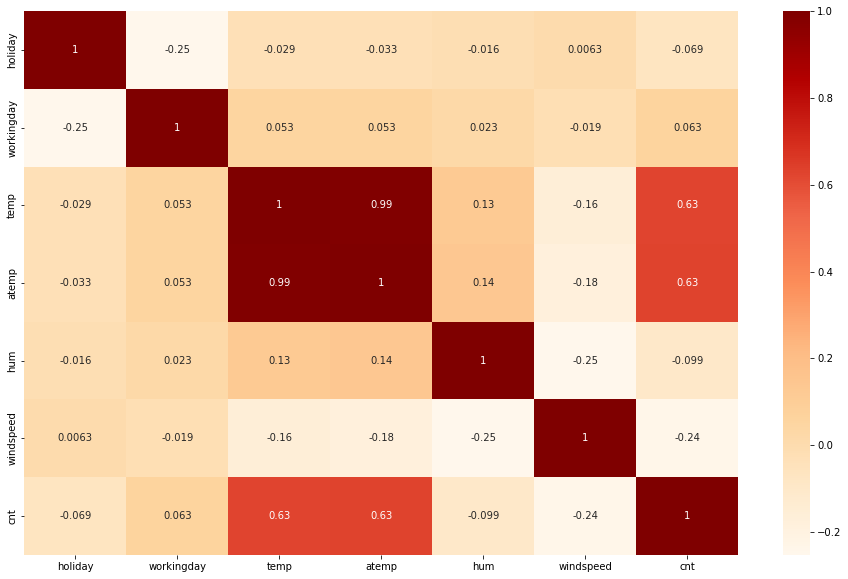

In [16]:
plt.figure(figsize = (16, 10))
sns.heatmap(bikes.corr(), annot = True, cmap="OrRd")
plt.show()

### Finding and Observition:
1. teamp and atemp have positive relationship with CNT
--------------------------

In [17]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,Mon,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,Tues,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Thurs,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Pre-processing Steps

### Dummy Variable Creation

In [18]:
# Get the dummy variables for the features 'season','mnth','weekday','weathersit' and store it in a new variable - 'dummy_vars'
dummy_vars = pd.get_dummies(bikes[['season','mnth','weekday','weathersit']], drop_first=True)
dummy_vars.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
# Add the dummy_vars to the original bikes dataframe
bikes = pd.concat([bikes,dummy_vars], axis=1)   

In [20]:
# Now let's see the head of our dataframe.
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
0,Spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,1
1,Spring,2018,Jan,0,Mon,0,Mist + Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,1
2,Spring,2018,Jan,0,Tues,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,0,0
3,Spring,2018,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,Spring,2018,Jan,0,Thurs,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


In [21]:
# Drop 'season','mnth','weekday','weathersit' as we have created the dummies for it
bikes = bikes.drop(['season','mnth','weekday','weathersit'], axis=1)

In [22]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,1
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [66]:
df_train, df_test = train_test_split(bikes, train_size=0.7, random_state=100)

In [67]:
print('df_train:' , df_train.shape)
print('df_test:' , df_test.shape)

df_train: (510, 30)
df_test: (220, 30)


### Feature Scaling

In [68]:
# We do a MinMax scaling
scaler = MinMaxScaler()    #Instantiating the object
cols = df_train.columns
df_train[cols] = scaler.fit_transform(df_train[cols])

### Building the Model


In [69]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [70]:
# Add a constant
X_train_sm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()


In [72]:
# checking a summary of the linear regression model obtained
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.81e-180
Time:                        15:33:40   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2394      0.035      6.761      0.000       0.170       0.309
yr                           0.2325      0.008     28.794      0.000       0.217       0.248
holiday                      0.0051      0.024      0.210      0.833      -0.042       0.052
workingday                   0.0904      0.012      7.292      0.000       0.066       0.115
temp                         0.3880      0.142      2.727      0.007       0.108       0.668
atemp                        0.0590      0.138      0.426      0.670      -0.213       0.331
hum                         -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                   -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_Spring               -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_Summer                0.0424      0.026      1.617      0.107      -0.009       0.094
season_Winter                0.1071      0.028      3.826      0.000       0.052       0.162
mnth_Aug                     0.0223      0.034      0.657      0.511      -0.044       0.089
mnth_Dec                    -0.0443      0.034     -1.316      0.189      -0.110       0.022
mnth_Feb                    -0.0323      0.033     -0.980      0.327      -0.097       0.032
mnth_Jan                    -0.0631      0.034     -1.876      0.061      -0.129       0.003
mnth_July                   -0.0327      0.035     -0.931      0.352      -0.102       0.036
mnth_June                    0.0060      0.025      0.241      0.810      -0.043       0.055
mnth_Mar                     0.0016      0.025      0.063      0.950      -0.047       0.050
mnth_May                     0.0255      0.021      1.208      0.228      -0.016       0.067
mnth_Nov                    -0.0398      0.036     -1.093      0.275      -0.111       0.032
mnth_Oct                     0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sep                     0.0868      0.032      2.711      0.007       0.024       0.150
weekday_Mon                  0.0448      0.014      3.239      0.001       0.018       0.072
weekday_Sat                  0.0097      0.016      0.623      0.534      -0.021       0.040
weekday_Sun                  0.0991      0.014      7.274      0.000       0.072       0.126
weekday_Thurs                0.0038      0.015      0.261      0.794      -0.025       0.033
weekday_Tues                -0.0119      0.015     -0.785      0.433      -0.042       0.018
weekday_Wed                 -0.0087      0.015     -0.564      0.573      -0.039       0.022
weathersit_Light Snow       -0.2550      0.026     -9.631      0.000      -0.307      -0.203
weathersit_Mist + Cloudy    -0.0595      0.010     -5.701      0.000      -0.080      -0.039
==============

In [28]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,86.43
3,temp,66.90
4,atemp,56.03
23,weekday_Sun,19.71
21,weekday_Mon,18.34
7,season_Spring,10.77
9,season_Winter,9.46
8,season_Summer,8.29
18,mnth_Nov,6.79
10,mnth_Aug,6.47


In [29]:
# Removing 'mnth_Oct' due to high P-Value and VIF
X = X_train.drop('mnth_Oct',axis=1)

# Add a constant
X_train_sm = sm.add_constant(X)

# Create a 2nd fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model2 = lr.fit()

# checking model summary
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.80e-181
Time:                        15:09:50   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2420      0.033      7.286      0.000       0.177       0.307
yr                           0.2325      0.008     28.839      0.000       0.217       0.248
holiday                      0.0060      0.024      0.252      0.801      -0.040       0.052
workingday                   0.0910      0.012      7.525      0.000       0.067       0.115
temp                         0.3880      0.142      2.730      0.007       0.109       0.667
atemp                        0.0587      0.138      0.425      0.671      -0.213       0.330
hum                         -0.1510      0.038     -3.945      0.000      -0.226      -0.076
windspeed                   -0.1836      0.026     -6.968      0.000      -0.235      -0.132
season_Spring               -0.0453      0.030     -1.512      0.131      -0.104       0.014
season_Summer                0.0400      0.024      1.683      0.093      -0.007       0.087
season_Winter                0.1100      0.024      4.510      0.000       0.062       0.158
mnth_Aug                     0.0188      0.030      0.633      0.527      -0.039       0.077
mnth_Dec                    -0.0500      0.020     -2.450      0.015      -0.090      -0.010
mnth_Feb                    -0.0359      0.028     -1.270      0.205      -0.092       0.020
mnth_Jan                    -0.0667      0.029     -2.308      0.021      -0.124      -0.010
mnth_July                   -0.0361      0.031     -1.160      0.247      -0.097       0.025
mnth_June                    0.0041      0.023      0.175      0.861      -0.042       0.050
mnth_Mar                    -0.0012      0.021     -0.056      0.955      -0.042       0.040
mnth_May                     0.0243      0.020      1.196      0.232      -0.016       0.064
mnth_Nov                    -0.0464      0.019     -2.383      0.018      -0.085      -0.008
mnth_Sep                     0.0825      0.025      3.288      0.001       0.033       0.132
weekday_Mon                  0.0454      0.014      3.344      0.001       0.019       0.072
weekday_Sat                  0.0097      0.016      0.621      0.535      -0.021       0.040
weekday_Sun                  0.0996      0.013      7.468      0.000       0.073       0.126
weekday_Thurs                0.0038      0.015      0.258      0.796      -0.025       0.033
weekday_Tues                -0.0120      0.015     -0.791      0.429      -0.042       0.018
weekday_Wed                 -0.0088      0.015     -0.570      0.569      -0.039       0.022
weathersit_Light Snow       -0.2548      0.026     -9.638      0.000      -0.307      -0.203
weathersit_Mist + Cloudy    -0.0596      0.010     -5.715      0.000      -0.080      -0.039
==============================================================================
Omnibus:                    

In [30]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,76.72
3,temp,66.90
4,atemp,56.02
22,weekday_Sun,17.49
20,weekday_Mon,16.31
7,season_Spring,10.77
9,season_Winter,7.20
8,season_Summer,6.84
10,mnth_Aug,4.97
14,mnth_July,4.45


In [31]:
# Removing 'atemp' due to high P-Value and VIF
X = X.drop('atemp',axis=1)

# Add a constant
X_train_sm = sm.add_constant(X)

# Create a 3rd fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model3 = lr.fit()

# check the model summary
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.93e-182
Time:                        15:09:50   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2420      0.033      7.291      0.000       0.177       0.307
yr                           0.2324      0.008     28.863      0.000       0.217       0.248
holiday                      0.0054      0.024      0.231      0.817      -0.041       0.052
workingday                   0.0913      0.012      7.561      0.000       0.068       0.115
temp                         0.4450      0.046      9.636      0.000       0.354       0.536
hum                         -0.1505      0.038     -3.937      0.000      -0.226      -0.075
windspeed                   -0.1860      0.026     -7.232      0.000      -0.237      -0.135
season_Spring               -0.0448      0.030     -1.497      0.135      -0.104       0.014
season_Summer                0.0407      0.024      1.717      0.087      -0.006       0.087
season_Winter                0.1105      0.024      4.539      0.000       0.063       0.158
mnth_Aug                     0.0170      0.029      0.578      0.563      -0.041       0.075
mnth_Dec                    -0.0499      0.020     -2.446      0.015      -0.090      -0.010
mnth_Feb                    -0.0360      0.028     -1.273      0.204      -0.092       0.020
mnth_Jan                    -0.0669      0.029     -2.316      0.021      -0.124      -0.010
mnth_July                   -0.0372      0.031     -1.201      0.230      -0.098       0.024
mnth_June                    0.0027      0.023      0.117      0.907      -0.043       0.048
mnth_Mar                    -0.0014      0.021     -0.067      0.947      -0.043       0.040
mnth_May                     0.0235      0.020      1.161      0.246      -0.016       0.063
mnth_Nov                    -0.0463      0.019     -2.381      0.018      -0.085      -0.008
mnth_Sep                     0.0818      0.025      3.269      0.001       0.033       0.131
weekday_Mon                  0.0455      0.014      3.357      0.001       0.019       0.072
weekday_Sat                  0.0091      0.016      0.586      0.558      -0.021       0.040
weekday_Sun                  0.0998      0.013      7.486      0.000       0.074       0.126
weekday_Thurs                0.0036      0.015      0.245      0.806      -0.025       0.032
weekday_Tues                -0.0119      0.015     -0.786      0.432      -0.042       0.018
weekday_Wed                 -0.0089      0.015     -0.576      0.565      -0.039       0.021
weathersit_Light Snow       -0.2557      0.026     -9.707      0.000      -0.307      -0.204
weathersit_Mist + Cloudy    -0.0596      0.010     -5.723      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.003   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Ja

In [32]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,76.71
21,weekday_Sun,17.49
19,weekday_Mon,16.31
6,season_Spring,10.75
8,season_Winter,7.18
3,temp,7.08
7,season_Summer,6.81
9,mnth_Aug,4.86
13,mnth_July,4.42
12,mnth_Jan,4.37


In [33]:
# Removing 'season_Spring' due to high P-Value and VIF
X = X.drop('season_Spring',axis=1)

# Add a constant
X_train_sm = sm.add_constant(X)

# Create a 4th fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model4 = lr.fit()

# Check the model summary
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     111.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          8.32e-183
Time:                        15:09:50   Log-Likelihood:                 525.82
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     484   BIC:                            -889.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2199      0.030      7.389      0.000       0.161       0.278
yr                           0.2320      0.008     28.796      0.000       0.216       0.248
holiday                     -0.0004      0.023     -0.016      0.988      -0.046       0.045
workingday                   0.0865      0.012      7.421      0.000       0.064       0.109
temp                         0.4539      0.046      9.898      0.000       0.364       0.544
hum                         -0.1527      0.038     -3.991      0.000      -0.228      -0.078
windspeed                   -0.1890      0.026     -7.366      0.000      -0.239      -0.139
season_Summer                0.0663      0.016      4.026      0.000       0.034       0.099
season_Winter                0.1356      0.018      7.654      0.000       0.101       0.170
mnth_Aug                     0.0395      0.025      1.569      0.117      -0.010       0.089
mnth_Dec                    -0.0542      0.020     -2.680      0.008      -0.094      -0.014
mnth_Feb                    -0.0535      0.026     -2.073      0.039      -0.104      -0.003
mnth_Jan                    -0.0839      0.027     -3.153      0.002      -0.136      -0.032
mnth_July                   -0.0152      0.027     -0.557      0.578      -0.069       0.038
mnth_June                    0.0092      0.023      0.406      0.685      -0.035       0.054
mnth_Mar                    -0.0131      0.019     -0.674      0.500      -0.051       0.025
mnth_May                     0.0219      0.020      1.085      0.278      -0.018       0.062
mnth_Nov                    -0.0451      0.019     -2.316      0.021      -0.083      -0.007
mnth_Sep                     0.0997      0.022      4.539      0.000       0.057       0.143
weekday_Mon                  0.0400      0.013      3.060      0.002       0.014       0.066
weekday_Sat                  0.0088      0.016      0.563      0.574      -0.022       0.039
weekday_Sun                  0.0938      0.013      7.365      0.000       0.069       0.119
weekday_Thurs                0.0028      0.015      0.193      0.847      -0.026       0.032
weekday_Tues                -0.0118      0.015     -0.777      0.437      -0.041       0.018
weekday_Wed                 -0.0093      0.015     -0.605      0.546      -0.040       0.021
weathersit_Light Snow       -0.2531      0.026     -9.617      0.000      -0.305      -0.201
weathersit_Mist + Cloudy    -0.0591      0.010     -5.673      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       80.490   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.047
Skew:                          -0.777   Prob(JB):       

In [34]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,62.45
20,weekday_Sun,13.95
18,weekday_Mon,13.12
3,temp,6.96
7,season_Winter,3.79
11,mnth_Jan,3.70
8,mnth_Aug,3.58
1,holiday,3.49
12,mnth_July,3.43
6,season_Summer,3.28


In [35]:
# Removing 'holiday' due to high P-Value 
X = X.drop('holiday',axis=1)

# Add a constant
X_train_sm = sm.add_constant(X)

# Create a 5th fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model5 = lr.fit()
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     111.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          8.32e-183
Time:                        15:09:50   Log-Likelihood:                 525.82
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     484   BIC:                            -889.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2195      0.046      4.780      0.000       0.129       0.310
yr                           0.2320      0.008     28.796      0.000       0.216       0.248
workingday                   0.0868      0.027      3.265      0.001       0.035       0.139
temp                         0.4539      0.046      9.898      0.000       0.364       0.544
hum                         -0.1527      0.038     -3.991      0.000      -0.228      -0.078
windspeed                   -0.1890      0.026     -7.366      0.000      -0.239      -0.139
season_Summer                0.0663      0.016      4.026      0.000       0.034       0.099
season_Winter                0.1356      0.018      7.654      0.000       0.101       0.170
mnth_Aug                     0.0395      0.025      1.569      0.117      -0.010       0.089
mnth_Dec                    -0.0542      0.020     -2.680      0.008      -0.094      -0.014
mnth_Feb                    -0.0535      0.026     -2.073      0.039      -0.104      -0.003
mnth_Jan                    -0.0839      0.027     -3.153      0.002      -0.136      -0.032
mnth_July                   -0.0152      0.027     -0.557      0.578      -0.069       0.038
mnth_June                    0.0092      0.023      0.406      0.685      -0.035       0.054
mnth_Mar                    -0.0131      0.019     -0.674      0.500      -0.051       0.025
mnth_May                     0.0219      0.020      1.085      0.278      -0.018       0.062
mnth_Nov                    -0.0451      0.019     -2.316      0.021      -0.083      -0.007
mnth_Sep                     0.0997      0.022      4.539      0.000       0.057       0.143
weekday_Mon                  0.0403      0.030      1.345      0.179      -0.019       0.099
weekday_Sat                  0.0088      0.016      0.563      0.574      -0.022       0.039
weekday_Sun                  0.0942      0.030      3.151      0.002       0.035       0.153
weekday_Thurs                0.0028      0.015      0.193      0.847      -0.026       0.032
weekday_Tues                -0.0118      0.015     -0.777      0.437      -0.041       0.018
weekday_Wed                 -0.0093      0.015     -0.605      0.546      -0.040       0.021
weathersit_Light Snow       -0.2531      0.026     -9.617      0.000      -0.305      -0.201
weathersit_Mist + Cloudy    -0.0591      0.010     -5.673      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       80.490   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.047
Skew:                          -0.777   Prob(JB):                     7.39e-48
Kurtosis:                       5.792   Cond. No.                     

In [36]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,37.54
3,hum,36.29
1,workingday,20.94
19,weekday_Sun,5.87
17,weekday_Mon,5.55
4,windspeed,4.96
6,season_Winter,4.77
5,season_Summer,3.98
7,mnth_Aug,3.95
11,mnth_July,3.71


In [37]:
# Removing 'weekday_Thurs' due to high P-Value
X = X.drop('weekday_Thurs',axis=1)

# Add a constant
X_train_sm = sm.add_constant(X)

# Create a 6th fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model6 = lr.fit()
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.2
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.77e-184
Time:                        15:09:50   Log-Likelihood:                 525.80
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     485   BIC:                            -895.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2207      0.045      4.858      0.000       0.131       0.310
yr                           0.2320      0.008     28.827      0.000       0.216       0.248
workingday                   0.0870      0.027      3.280      0.001       0.035       0.139
temp                         0.4538      0.046      9.906      0.000       0.364       0.544
hum                         -0.1524      0.038     -3.991      0.000      -0.227      -0.077
windspeed                   -0.1891      0.026     -7.373      0.000      -0.239      -0.139
season_Summer                0.0663      0.016      4.032      0.000       0.034       0.099
season_Winter                0.1356      0.018      7.666      0.000       0.101       0.170
mnth_Aug                     0.0395      0.025      1.571      0.117      -0.010       0.089
mnth_Dec                    -0.0544      0.020     -2.694      0.007      -0.094      -0.015
mnth_Feb                    -0.0534      0.026     -2.074      0.039      -0.104      -0.003
mnth_Jan                    -0.0839      0.027     -3.158      0.002      -0.136      -0.032
mnth_July                   -0.0152      0.027     -0.557      0.578      -0.069       0.038
mnth_June                    0.0093      0.023      0.410      0.682      -0.035       0.054
mnth_Mar                    -0.0132      0.019     -0.680      0.497      -0.051       0.025
mnth_May                     0.0220      0.020      1.089      0.277      -0.018       0.062
mnth_Nov                    -0.0452      0.019     -2.327      0.020      -0.083      -0.007
mnth_Sep                     0.0997      0.022      4.542      0.000       0.057       0.143
weekday_Mon                  0.0390      0.029      1.338      0.182      -0.018       0.096
weekday_Sat                  0.0072      0.013      0.541      0.589      -0.019       0.033
weekday_Sun                  0.0929      0.029      3.193      0.001       0.036       0.150
weekday_Tues                -0.0133      0.013     -1.029      0.304      -0.039       0.012
weekday_Wed                 -0.0109      0.013     -0.828      0.408      -0.037       0.015
weathersit_Light Snow       -0.2530      0.026     -9.625      0.000      -0.305      -0.201
weathersit_Mist + Cloudy    -0.0591      0.010     -5.677      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       80.799   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.214
Skew:                          -0.780   Prob(JB):                     4.12e-48
Kurtosis:                       5.800   Cond. No.                         29.7
==============================================================================

Note

In [38]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,37.45
3,hum,35.98
1,workingday,20.46
19,weekday_Sun,5.68
17,weekday_Mon,5.36
4,windspeed,4.95
6,season_Winter,4.76
5,season_Summer,3.97
7,mnth_Aug,3.95
11,mnth_July,3.71


In [39]:
# Removing 'mnth_June' due to high P-Value
X = X.drop('mnth_June',axis=1)

# Add a constant
X_train_sm = sm.add_constant(X)

# Create a 7th fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model7 = lr.fit()
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.58e-185
Time:                        15:09:50   Log-Likelihood:                 525.72
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     486   BIC:                            -901.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2198      0.045      4.847      0.000       0.131       0.309
yr                           0.2317      0.008     28.936      0.000       0.216       0.247
workingday                   0.0880      0.026      3.331      0.001       0.036       0.140
temp                         0.4637      0.039     11.911      0.000       0.387       0.540
hum                         -0.1546      0.038     -4.094      0.000      -0.229      -0.080
windspeed                   -0.1905      0.025     -7.502      0.000      -0.240      -0.141
season_Summer                0.0660      0.016      4.022      0.000       0.034       0.098
season_Winter                0.1333      0.017      7.950      0.000       0.100       0.166
mnth_Aug                     0.0335      0.020      1.643      0.101      -0.007       0.074
mnth_Dec                    -0.0541      0.020     -2.686      0.007      -0.094      -0.015
mnth_Feb                    -0.0543      0.026     -2.118      0.035      -0.105      -0.004
mnth_Jan                    -0.0842      0.027     -3.171      0.002      -0.136      -0.032
mnth_July                   -0.0219      0.022     -0.997      0.319      -0.065       0.021
mnth_Mar                    -0.0153      0.019     -0.816      0.415      -0.052       0.022
mnth_May                     0.0178      0.017      1.021      0.308      -0.016       0.052
mnth_Nov                    -0.0448      0.019     -2.311      0.021      -0.083      -0.007
mnth_Sep                     0.0954      0.019      4.968      0.000       0.058       0.133
weekday_Mon                  0.0400      0.029      1.378      0.169      -0.017       0.097
weekday_Sat                  0.0071      0.013      0.535      0.593      -0.019       0.033
weekday_Sun                  0.0940      0.029      3.246      0.001       0.037       0.151
weekday_Tues                -0.0131      0.013     -1.020      0.308      -0.038       0.012
weekday_Wed                 -0.0110      0.013     -0.837      0.403      -0.037       0.015
weathersit_Light Snow       -0.2528      0.026     -9.627      0.000      -0.304      -0.201
weathersit_Mist + Cloudy    -0.0588      0.010     -5.667      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       79.988   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.122
Skew:                          -0.777   Prob(JB):                     5.26e-47
Kurtosis:                       5.760   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [40]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.88
2,temp,25.64
1,workingday,20.35
18,weekday_Sun,5.65
16,weekday_Mon,5.34
4,windspeed,4.82
6,season_Winter,4.22
5,season_Summer,3.95
10,mnth_Jan,2.94
7,mnth_Aug,2.59


In [41]:
# Removing 'weekday_Sat' due to high P-Value 
X = X.drop('weekday_Sat',axis=1)

# Add a constant
X_train_sm = sm.add_constant(X)

# Create a 8th fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model8 = lr.fit()
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     127.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.66e-186
Time:                        15:09:50   Log-Likelihood:                 525.56
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     487   BIC:                            -907.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2229      0.045      4.960      0.000       0.135       0.311
yr                           0.2317      0.008     28.953      0.000       0.216       0.247
workingday                   0.0878      0.026      3.326      0.001       0.036       0.140
temp                         0.4631      0.039     11.909      0.000       0.387       0.539
hum                         -0.1553      0.038     -4.116      0.000      -0.229      -0.081
windspeed                   -0.1905      0.025     -7.508      0.000      -0.240      -0.141
season_Summer                0.0659      0.016      4.017      0.000       0.034       0.098
season_Winter                0.1335      0.017      7.965      0.000       0.101       0.166
mnth_Aug                     0.0337      0.020      1.654      0.099      -0.006       0.074
mnth_Dec                    -0.0544      0.020     -2.700      0.007      -0.094      -0.015
mnth_Feb                    -0.0544      0.026     -2.122      0.034      -0.105      -0.004
mnth_Jan                    -0.0845      0.027     -3.187      0.002      -0.137      -0.032
mnth_July                   -0.0214      0.022     -0.976      0.330      -0.064       0.022
mnth_Mar                    -0.0156      0.019     -0.832      0.406      -0.052       0.021
mnth_May                     0.0179      0.017      1.026      0.305      -0.016       0.052
mnth_Nov                    -0.0455      0.019     -2.354      0.019      -0.084      -0.008
mnth_Sep                     0.0952      0.019      4.962      0.000       0.057       0.133
weekday_Mon                  0.0376      0.029      1.312      0.190      -0.019       0.094
weekday_Sun                  0.0916      0.029      3.204      0.001       0.035       0.148
weekday_Tues                -0.0154      0.012     -1.257      0.209      -0.039       0.009
weekday_Wed                 -0.0132      0.012     -1.060      0.290      -0.038       0.011
weathersit_Light Snow       -0.2538      0.026     -9.692      0.000      -0.305      -0.202
weathersit_Mist + Cloudy    -0.0584      0.010     -5.647      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       79.681   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.997
Skew:                          -0.773   Prob(JB):                     5.60e-47
Kurtosis:                       5.763   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.86
2,temp,25.60
1,workingday,20.24
17,weekday_Sun,5.59
16,weekday_Mon,5.28
4,windspeed,4.81
6,season_Winter,4.21
5,season_Summer,3.95
10,mnth_Jan,2.93
7,mnth_Aug,2.59


In [43]:
# Removing 'mnth_Mar' due to high P-Value 
X = X.drop('mnth_Mar',axis=1)

# Add a constant
X_train_sm = sm.add_constant(X)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model9 = lr.fit()

# check the summary of the model
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.2
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          9.23e-187
Time:                        15:09:50   Log-Likelihood:                 525.20
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     488   BIC:                            -913.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2083      0.041      5.036      0.000       0.127       0.290
yr                           0.2313      0.008     28.963      0.000       0.216       0.247
workingday                   0.0872      0.026      3.305      0.001       0.035       0.139
temp                         0.4778      0.035     13.819      0.000       0.410       0.546
hum                         -0.1577      0.038     -4.194      0.000      -0.232      -0.084
windspeed                   -0.1905      0.025     -7.511      0.000      -0.240      -0.141
season_Summer                0.0710      0.015      4.669      0.000       0.041       0.101
season_Winter                0.1401      0.015      9.507      0.000       0.111       0.169
mnth_Aug                     0.0387      0.019      1.988      0.047       0.000       0.077
mnth_Dec                    -0.0472      0.018     -2.596      0.010      -0.083      -0.011
mnth_Feb                    -0.0421      0.021     -2.010      0.045      -0.083      -0.001
mnth_Jan                    -0.0710      0.021     -3.385      0.001      -0.112      -0.030
mnth_July                   -0.0174      0.021     -0.814      0.416      -0.059       0.025
mnth_May                     0.0201      0.017      1.162      0.246      -0.014       0.054
mnth_Nov                    -0.0413      0.019     -2.214      0.027      -0.078      -0.005
mnth_Sep                     0.1003      0.018      5.530      0.000       0.065       0.136
weekday_Mon                  0.0377      0.029      1.314      0.189      -0.019       0.094
weekday_Sun                  0.0910      0.029      3.187      0.002       0.035       0.147
weekday_Tues                -0.0152      0.012     -1.244      0.214      -0.039       0.009
weekday_Wed                 -0.0132      0.012     -1.058      0.291      -0.038       0.011
weathersit_Light Snow       -0.2528      0.026     -9.667      0.000      -0.304      -0.201
weathersit_Mist + Cloudy    -0.0582      0.010     -5.626      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       77.316   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.055
Skew:                          -0.766   Prob(JB):                     1.62e-43
Kurtosis:                       5.632   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.24
2,temp,22.78
1,workingday,17.85
16,weekday_Sun,5.01
15,weekday_Mon,4.86
4,windspeed,4.68
5,season_Summer,3.61
6,season_Winter,3.47
7,mnth_Aug,2.38
20,weathersit_Mist + Cloudy,2.31


In [45]:
# Removing 'mnth_July' due to high P-Value 
X = X.drop('mnth_July',axis=1)

# Add a constant
X_train_sm = sm.add_constant(X)

# Create a 10th fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model10 = lr.fit()

# check the summary of the model
lr_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.07e-187
Time:                        15:09:50   Log-Likelihood:                 524.86
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     489   BIC:                            -918.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2098      0.041      5.079      0.000       0.129       0.291
yr                           0.2316      0.008     29.039      0.000       0.216       0.247
workingday                   0.0863      0.026      3.276      0.001       0.035       0.138
temp                         0.4639      0.030     15.437      0.000       0.405       0.523
hum                         -0.1554      0.037     -4.146      0.000      -0.229      -0.082
windspeed                   -0.1890      0.025     -7.474      0.000      -0.239      -0.139
season_Summer                0.0764      0.014      5.576      0.000       0.049       0.103
season_Winter                0.1437      0.014     10.233      0.000       0.116       0.171
mnth_Aug                     0.0475      0.016      2.949      0.003       0.016       0.079
mnth_Dec                    -0.0474      0.018     -2.608      0.009      -0.083      -0.012
mnth_Feb                    -0.0404      0.021     -1.939      0.053      -0.081       0.001
mnth_Jan                    -0.0703      0.021     -3.356      0.001      -0.112      -0.029
mnth_May                     0.0214      0.017      1.243      0.214      -0.012       0.055
mnth_Nov                    -0.0418      0.019     -2.244      0.025      -0.078      -0.005
mnth_Sep                     0.1068      0.016      6.554      0.000       0.075       0.139
weekday_Mon                  0.0364      0.029      1.271      0.204      -0.020       0.093
weekday_Sun                  0.0897      0.029      3.147      0.002       0.034       0.146
weekday_Tues                -0.0156      0.012     -1.275      0.203      -0.040       0.008
weekday_Wed                 -0.0137      0.012     -1.105      0.270      -0.038       0.011
weathersit_Light Snow       -0.2537      0.026     -9.718      0.000      -0.305      -0.202
weathersit_Mist + Cloudy    -0.0586      0.010     -5.678      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       79.581   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.954
Skew:                          -0.782   Prob(JB):                     1.89e-45
Kurtosis:                       5.691   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.86
1,workingday,17.85
2,temp,16.72
15,weekday_Sun,5.00
14,weekday_Mon,4.85
4,windspeed,4.63
6,season_Winter,3.14
5,season_Summer,2.88
19,weathersit_Mist + Cloudy,2.30
10,mnth_Jan,2.14


In [47]:
# Removing 'weekday_Wed' due to high P-Value
X = X.drop('weekday_Wed',axis=1)

# Add a constant
X_train_sm = sm.add_constant(X)

# Create a 11th fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model11 = lr.fit()

# check the summary of the model
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.2
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.59e-188
Time:                        15:09:51   Log-Likelihood:                 524.22
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     490   BIC:                            -923.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2086      0.041      5.050      0.000       0.127       0.290
yr                           0.2316      0.008     29.031      0.000       0.216       0.247
workingday                   0.0854      0.026      3.243      0.001       0.034       0.137
temp                         0.4633      0.030     15.417      0.000       0.404       0.522
hum                         -0.1566      0.037     -4.179      0.000      -0.230      -0.083
windspeed                   -0.1894      0.025     -7.490      0.000      -0.239      -0.140
season_Summer                0.0762      0.014      5.564      0.000       0.049       0.103
season_Winter                0.1433      0.014     10.203      0.000       0.116       0.171
mnth_Aug                     0.0477      0.016      2.961      0.003       0.016       0.079
mnth_Dec                    -0.0466      0.018     -2.566      0.011      -0.082      -0.011
mnth_Feb                    -0.0413      0.021     -1.983      0.048      -0.082      -0.000
mnth_Jan                    -0.0702      0.021     -3.347      0.001      -0.111      -0.029
mnth_May                     0.0212      0.017      1.233      0.218      -0.013       0.055
mnth_Nov                    -0.0417      0.019     -2.237      0.026      -0.078      -0.005
mnth_Sep                     0.1072      0.016      6.581      0.000       0.075       0.139
weekday_Mon                  0.0389      0.029      1.362      0.174      -0.017       0.095
weekday_Sun                  0.0920      0.028      3.237      0.001       0.036       0.148
weekday_Tues                -0.0124      0.012     -1.043      0.297      -0.036       0.011
weathersit_Light Snow       -0.2522      0.026     -9.670      0.000      -0.303      -0.201
weathersit_Mist + Cloudy    -0.0584      0.010     -5.658      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       79.765   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.093
Skew:                          -0.777   Prob(JB):                     1.45e-46
Kurtosis:                       5.742   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.79
1,workingday,17.78
2,temp,16.70
15,weekday_Sun,4.97
14,weekday_Mon,4.82
4,windspeed,4.63
6,season_Winter,3.14
5,season_Summer,2.88
18,weathersit_Mist + Cloudy,2.30
10,mnth_Jan,2.14


In [49]:
# Removing 'weekday_Tues' due to high P-Value 
X = X.drop('weekday_Tues',axis=1)

# Add a constant
X_train_sm = sm.ad_constant(X)

# Create a 12th fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model12 = lr.fit()

# check the summary of the model
lr_model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.16e-189
Time:                        15:09:51   Log-Likelihood:                 523.65
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     491   BIC:                            -928.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1997      0.040      4.941      0.000       0.120       0.279
yr                           0.2311      0.008     29.018      0.000       0.215       0.247
workingday                   0.0927      0.025      3.649      0.000       0.043       0.143
temp                         0.4642      0.030     15.452      0.000       0.405       0.523
hum                         -0.1583      0.037     -4.228      0.000      -0.232      -0.085
windspeed                   -0.1896      0.025     -7.497      0.000      -0.239      -0.140
season_Summer                0.0759      0.014      5.541      0.000       0.049       0.103
season_Winter                0.1426      0.014     10.165      0.000       0.115       0.170
mnth_Aug                     0.0479      0.016      2.969      0.003       0.016       0.080
mnth_Dec                    -0.0462      0.018     -2.543      0.011      -0.082      -0.011
mnth_Feb                    -0.0409      0.021     -1.962      0.050      -0.082    5.13e-05
mnth_Jan                    -0.0701      0.021     -3.345      0.001      -0.111      -0.029
mnth_May                     0.0219      0.017      1.278      0.202      -0.012       0.056
mnth_Nov                    -0.0405      0.019     -2.176      0.030      -0.077      -0.004
mnth_Sep                     0.1077      0.016      6.614      0.000       0.076       0.140
weekday_Mon                  0.0486      0.027      1.803      0.072      -0.004       0.102
weekday_Sun                  0.1017      0.027      3.785      0.000       0.049       0.155
weathersit_Light Snow       -0.2515      0.026     -9.645      0.000      -0.303      -0.200
weathersit_Mist + Cloudy    -0.0582      0.010     -5.636      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       78.994   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.667
Skew:                          -0.768   Prob(JB):                     2.96e-46
Kurtosis:                       5.739   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.95
1,workingday,17.23
2,temp,16.63
15,weekday_Sun,4.64
4,windspeed,4.58
14,weekday_Mon,4.50
6,season_Winter,3.12
5,season_Summer,2.87
17,weathersit_Mist + Cloudy,2.29
10,mnth_Jan,2.12


In [51]:
# Removing 'mnth_May' due to high  P value
X = X.drop('mnth_May',axis=1)

# Add a constant
X_train_sm = sm.add_constant(X)

# Create a 13th fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model13 = lr.fit()

# check the summary of the model
lr_model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.74e-190
Time:                        15:09:51   Log-Likelihood:                 522.81
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -933.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1925      0.040      4.806      0.000       0.114       0.271
yr                           0.2306      0.008     28.971      0.000       0.215       0.246
workingday                   0.0934      0.025      3.677      0.000       0.044       0.143
temp                         0.4690      0.030     15.724      0.000       0.410       0.528
hum                         -0.1515      0.037     -4.085      0.000      -0.224      -0.079
windspeed                   -0.1907      0.025     -7.542      0.000      -0.240      -0.141
season_Summer                0.0835      0.012      6.776      0.000       0.059       0.108
season_Winter                0.1426      0.014     10.156      0.000       0.115       0.170
mnth_Aug                     0.0467      0.016      2.898      0.004       0.015       0.078
mnth_Dec                    -0.0450      0.018     -2.483      0.013      -0.081      -0.009
mnth_Feb                    -0.0387      0.021     -1.865      0.063      -0.080       0.002
mnth_Jan                    -0.0680      0.021     -3.252      0.001      -0.109      -0.027
mnth_Nov                    -0.0394      0.019     -2.117      0.035      -0.076      -0.003
mnth_Sep                     0.1068      0.016      6.560      0.000       0.075       0.139
weekday_Mon                  0.0492      0.027      1.823      0.069      -0.004       0.102
weekday_Sun                  0.1020      0.027      3.792      0.000       0.049       0.155
weathersit_Light Snow       -0.2537      0.026     -9.745      0.000      -0.305      -0.203
weathersit_Mist + Cloudy    -0.0584      0.010     -5.660      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       77.416   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.818
Skew:                          -0.770   Prob(JB):                     3.01e-43
Kurtosis:                       5.616   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.73
1,workingday,17.11
2,temp,16.54
14,weekday_Sun,4.60
4,windspeed,4.53
13,weekday_Mon,4.47
6,season_Winter,3.12
5,season_Summer,2.36
16,weathersit_Mist + Cloudy,2.29
10,mnth_Jan,2.12


In [53]:
# Removing 'weekday_Mon' due to high P value
X = X.drop('weekday_Mon',axis=1)

# Add a constant
X_train_sm = sm.add_constant(X)

# Create a 14th fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model14 = lr.fit()

# check the summary of the model
lr_model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.45e-190
Time:                        15:09:51   Log-Likelihood:                 521.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2352      0.033      7.228      0.000       0.171       0.299
yr                           0.2308      0.008     28.929      0.000       0.215       0.246
workingday                   0.0515      0.011      4.767      0.000       0.030       0.073
temp                         0.4680      0.030     15.655      0.000       0.409       0.527
hum                         -0.1504      0.037     -4.047      0.000      -0.223      -0.077
windspeed                   -0.1914      0.025     -7.551      0.000      -0.241      -0.142
season_Summer                0.0833      0.012      6.746      0.000       0.059       0.108
season_Winter                0.1430      0.014     10.162      0.000       0.115       0.171
mnth_Aug                     0.0467      0.016      2.894      0.004       0.015       0.078
mnth_Dec                    -0.0464      0.018     -2.556      0.011      -0.082      -0.011
mnth_Feb                    -0.0409      0.021     -1.970      0.049      -0.082   -9.94e-05
mnth_Jan                    -0.0701      0.021     -3.349      0.001      -0.111      -0.029
mnth_Nov                    -0.0435      0.019     -2.349      0.019      -0.080      -0.007
mnth_Sep                     0.1045      0.016      6.423      0.000       0.073       0.136
weekday_Sun                  0.0600      0.014      4.302      0.000       0.033       0.087
weathersit_Light Snow       -0.2533      0.026     -9.708      0.000      -0.305      -0.202
weathersit_Mist + Cloudy    -0.0582      0.010     -5.630      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       83.235   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.544
Skew:                          -0.809   Prob(JB):                     1.29e-48
Kurtosis:                       5.786   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.38
2,temp,15.14
1,workingday,4.67
4,windspeed,4.09
6,season_Winter,3.08
5,season_Summer,2.32
15,weathersit_Mist + Cloudy,2.23
0,yr,2.07
10,mnth_Jan,1.99
11,mnth_Nov,1.84


In [55]:
# Removing 'hum' due to high VIF value
X = X.drop('hum',axis=1)

# Add a constant
X_train_sm = sm.add_constant(X)

# Create a 15th fitted model
lr = sm.OLS(y_train, X_train_sm)
lr_model15 = lr.fit()

# check the summary of the model
lr_model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.23e-188
Time:                        15:09:51   Log-Likelihood:                 512.76
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     494   BIC:                            -925.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1558      0.026      5.910      0.000       0.104       0.208
yr                           0.2344      0.008     29.116      0.000       0.219       0.250
workingday                   0.0542      0.011      4.950      0.000       0.033       0.076
temp                         0.4396      0.030     14.898      0.000       0.382       0.498
windspeed                   -0.1648      0.025     -6.630      0.000      -0.214      -0.116
season_Summer                0.0781      0.012      6.257      0.000       0.054       0.103
season_Winter                0.1322      0.014      9.422      0.000       0.105       0.160
mnth_Aug                     0.0446      0.016      2.720      0.007       0.012       0.077
mnth_Dec                    -0.0540      0.018     -2.940      0.003      -0.090      -0.018
mnth_Feb                    -0.0463      0.021     -2.199      0.028      -0.088      -0.005
mnth_Jan                    -0.0797      0.021     -3.773      0.000      -0.121      -0.038
mnth_Nov                    -0.0434      0.019     -2.307      0.021      -0.080      -0.006
mnth_Sep                     0.0978      0.016      5.950      0.000       0.066       0.130
weekday_Sun                  0.0646      0.014      4.572      0.000       0.037       0.092
weathersit_Light Snow       -0.2953      0.024    -12.147      0.000      -0.343      -0.248
weathersit_Mist + Cloudy    -0.0822      0.009     -9.544      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       83.138   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.165
Skew:                          -0.804   Prob(JB):                     3.47e-49
Kurtosis:                       5.814   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.57
1,workingday,4.56
3,windspeed,4.07
5,season_Winter,2.64
4,season_Summer,2.09
0,yr,2.06
12,weekday_Sun,1.81
10,mnth_Nov,1.80
6,mnth_Aug,1.63
14,weathersit_Mist + Cloudy,1.59


### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [57]:
y_train_cnt = lr_model15.predict(X_train_sm)

Text(0.5, 0, 'Errors')

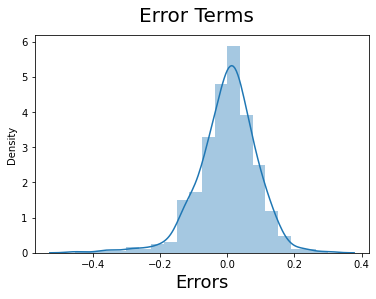

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 15th model.

In [59]:
cols = df_test.columns
df_test[cols] = scaler.transform(df_test[cols])

#### Dividing into X_test and y_test

In [60]:
# Spliting into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [61]:
# Adding the constant column
X_test_sm = sm.add_constant(X_test)
# Removing all the columns that have been removed from the train model
X_test_sm = X_test_sm.drop(['mnth_Oct','atemp','season_Spring','holiday','weekday_Thurs','mnth_June',
                             'weekday_Sat','mnth_Mar','mnth_July','weekday_Wed','weekday_Tues','mnth_May',
                           'weekday_Mon','hum'], axis=1)

In [62]:
# Making prediction using Training Model 
y_test_pred = lr_model15.predict(X_test_sm)

### Model Evaluation

Text(0, 0.5, 'y_pred')

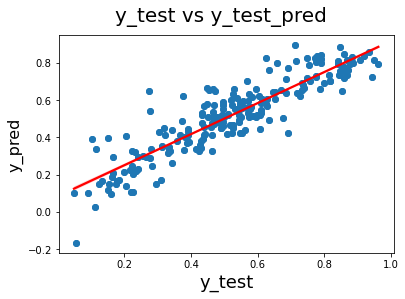

In [74]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [64]:
r2_score(y_test, y_test_pred)

0.8095370585769067

We can see that the equation of our best fitted line is:

$ cnt = 0.156 + (0.234  \times  yr + 0.054  \times  workingday + 0.44 \times temp - 0.165 \times windspeed + 0.078 \times seasonSummer + 0.132 \times seasonWinter + 0.045 \times mnthAug - 0.054 \times mnthDec - 0.046 \times mnthFeb - 0.08 \times mnthJan - 0.043 \times mnthNov + 0.098 \times mnthSep + 0.065 \times weekdaySun - 0.295 \times 'weathersitLight Snow' - 0.082 \times  'weathersitMist + Cloudy')
$


### The Summary

The model has an R-squared value of 0.844, indicating that around 84.4% of the variability in the dependent variable can be explained by the independent variables included in the model. The adjusted R-squared value is 0.839, which takes into account the number of predictors in the model.

The F-statistic is 178.3, and the corresponding p-value is very low (3.23E-188), suggesting that the overall model is statistically significant.

The coefficients of the independent variables indicate the strength and direction of their relationship with the dependent variable. The constant term (intercept) has a coefficient of 0.1558.

The coefficients of the other independent variables are as follows:

- "yr" (year): 0.2344
- "workingday": 0.0542
- "temp" (temperature): 0.4396
- "windspeed": -0.1648
- "season_Summer": 0.0781
- "season_Winter": 0.1322
- "mnth_Aug" (month August): 0.0446
- "mnth_Dec" (month December): -0.054
- "mnth_Feb" (month February): -0.0463
- "mnth_Jan" (month January): -0.0797
- "mnth_Nov" (month November): -0.0434
- "mnth_Sep" (month September): 0.0978
- "weekday_Sun" (Sunday): 0.0646
- "weathersit_Light Snow": -0.2953
- "weathersit_Mist + Cloudy": -0.0822

Each coefficient is associated with a standard error, t-value, and p-value. The t-value measures the significance of each coefficient, and the p-value indicates the probability of observing such a coefficient by chance alone.

The confidence intervals [0.025, 0.975] provide a range within which we can be confident that the true population value lies for each coefficient.

#### Findings:

Based on this OLS model, we can infer that several independent variables have a significant impact on the dependent variable "cnt."

**Positive relationships:**

- The year ("yr") variable has a positive coefficient of 0.2344, suggesting that as the year increases, the count also tends to increase.
- Temperature ("temp") has a positive coefficient of 0.4396, indicating that higher temperatures are associated with higher counts.

**Negative relationships:**

- Windspeed has a negative coefficient of -0.1648, suggesting that higher windspeeds are associated with lower counts.
- Various month variables (e.g., "mnth_Dec," "mnth_Feb") have negative coefficients, indicating that counts tend to be lower in these months compared to a reference month.
- The weather variables ("weathersit_Light Snow" and "weathersit_Mist + Cloudy") also have negative coefficients, indicating that unfavorable weather conditions are associated with lower counts.

**Other variables:**

- The variables "workingday," "season_Summer," "season_Winter," and "weekday_Sun" have positive coefficients, suggesting that these factors are associated with higher counts.

Overall, this model provides insights into the relationships between the independent variables and the dependent variable, allowing for predictions and further analysis of count patterns.